In [1]:
!git clone https://github.com/eprokhodtsev/python-pricer.git

Cloning into 'python-pricer'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 43 (delta 9), reused 11 (delta 1), pack-reused 0
Unpacking objects: 100% (43/43), done.


In [2]:
class Interpolator:
    """Linear interpolator.
    """

    @staticmethod
    def interpolate(x_list: list, y_list: list, z: float):
        """Linear interpolate.
        Parameters
        __________
        x_list : list
            x values.
        y_list: list
            y values.
        z: float
            Interpolate in that point z.
        Returns
        _______
        float
            Interpolate value.
        Raises
        ______
        ValueError
            x_list must be sorted ASC.
        """
        if x_list != sorted(x_list):
            raise ValueError('x_list must be sorted ASC')
        for index, element in enumerate(x_list):
            if z <= element:
                delta = (z - x_list[index - 1]) / (x_list[index] - x_list[index - 1])
                answer = y_list[index - 1] + (y_list[index] - y_list[index - 1]) * delta
                break
        return answer

In [3]:
import pandas as pd
import numpy as np
import datetime

rub = pd.read_csv('/content/python-pricer/data/RUB swap points.csv')
usd = pd.read_csv('/content/python-pricer/data/USD rates.csv')
usd.loc[0,'Conv, adj'] = usd.loc[0,'Unnamed: 1']

In [4]:
#today = datetime.date.today()
today = datetime.datetime(2021, 10, 28)

tenor_dict = {
    'ON':datetime.timedelta(),
    '1W':datetime.timedelta(weeks = 1),
    '2W':datetime.timedelta(weeks = 2),
    '1M':datetime.timedelta(weeks = 1 * 4),
    '2M':datetime.timedelta(weeks = 2 * 4),
    '3M':datetime.timedelta(weeks = 3 * 4),
    '6M':datetime.timedelta(weeks = 6 * 4),
    '9M':datetime.timedelta(weeks = 9 * 4),
    '12M':datetime.timedelta(weeks = 12 * 4),
    '2Y':datetime.timedelta(weeks = 2 * 52),
    '3Y':datetime.timedelta(weeks = 3 * 52),
    '4Y':datetime.timedelta(weeks = 4 * 52),
    '5Y':datetime.timedelta(weeks = 5 * 52),
}

rub['date'] = pd.to_datetime(rub['Term'].apply(lambda x: tenor_dict[x] + today))
rub['date_sec'] = rub['date'].apply(lambda x: x.timestamp())

rub['date_day'] = rub['Term'].apply(lambda x: tenor_dict[x].days)
rub['df'] = rub['date_day'].apply(lambda x: 1/(1+x/360))

In [5]:
usd

,USD Rate MKT Data,Unnamed: 1,"Conv, adj",StartDate,EndDate
0,Libor3m,0.001295,0.001295,10/28/21,1/28/22
1,EDZ1,99.810000,0.000140,12/15/21,3/15/22
2,EDH2,99.785000,0.000730,3/16/22,6/16/22
3,EDM2,99.680000,0.001650,6/15/22,9/15/22
4,EDU2,99.520000,0.002870,9/21/22,12/21/22
5,EDZ2,99.295000,0.004510,12/21/22,3/21/23
6,EDH3,99.110000,0.006360,3/15/23,6/15/23
7,EDM3,98.920000,0.008390,6/21/23,9/21/23
8,EDU3,98.690000,0.011040,9/20/23,12/20/23
9,EDZ3,98.585000,0.013800,12/20/23,3/20/24


In [6]:
rub

,Term,SW POINTS,Unnamed: 2,Unnamed: 3,Unnamed: 4,date,date_sec,date_day,df
0,ON,131,NaN,NaN,NaN,2021-10-28,1.635379e+09,0,1.000000
1,1W,933,NaN,NaN,NaN,2021-11-04,1.635984e+09,7,0.980926
2,2W,2269,NaN,NaN,NaN,2021-11-11,1.636589e+09,14,0.962567
3,1M,4156,NaN,NaN,NaN,2021-11-25,1.637798e+09,28,0.927835
4,2M,8174,NaN,NaN,NaN,2021-12-23,1.640218e+09,56,0.865385
5,3M,12766,NaN,NaN,NaN,2022-01-20,1.642637e+09,84,0.810811
6,6M,25723,NaN,NaN,NaN,2022-04-14,1.649894e+09,168,0.681818
7,9M,39130,NaN,NaN,NaN,2022-07-07,1.657152e+09,252,0.588235
8,12M,52760,NaN,NaN,NaN,2022-09-29,1.664410e+09,336,0.517241
9,2Y,101653,NaN,NaN,NaN,2023-10-26,1.698278e+09,728,0.330882


In [7]:
def swop_point(date='12/15/21'):
  #date = datetime.datetime.fromisoformat(date)
  date = datetime.datetime.strptime(date, '%m/%d/%y')
  #return np.interp(date.timestamp(), rub['date_sec'], rub['SW POINTS'])
  return Interpolator.interpolate(list(rub['date_sec']), list(rub['SW POINTS']), date.timestamp())

swop_point()

7026.0

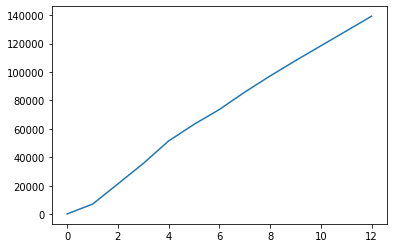

In [8]:
usd['StartDate'].apply(swop_point).plot()

In [9]:
temp = [1] * len(usd)
discount = pd.DataFrame(temp, index=usd['StartDate'])
discount


,0
StartDate,
10/28/21,1
12/15/21,1
3/16/22,1
6/15/22,1
9/21/22,1
12/21/22,1
3/15/23,1
6/21/23,1
9/20/23,1
